In [40]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt

When working with real world data, we often take the log of the probability. This is expressed as a negative value because $log(x) < 0$ if $x < 1$. 

Properties of logarithms:
$log(ab) = log(a) + log(b)$

$log(a/b) = log(a) - log(b)$

$log(a + b) \neq log(a) + log(b)$

Here, we define a uniform prior over our hypotheses and take the log. $P(H_1) = P(H_2) = P(H_3) = \frac{1}{3}$

In [21]:
log_prior = np.log(np.array([1/3, 1/3, 1/3]))
log_prior

array([-1.09861229, -1.09861229, -1.09861229])

From last tim: The likelihood is how well any hypothesis explains the data. Technically, this is what probability the hypothesis assigns to the data, or $P(D | H)$.

In [13]:
nH = 2 #Number of heads
nT = 1 #Number of tails

In [20]:
log_likelihood = np.log([stats.binom.pmf(nH, nH + nT, 0.5), #H1
 stats.binom.pmf(nH, nH + nT, 0.75), #H2
 stats.binom.pmf(nH, nH + nT, 0.25)]) #H3
log_likelihood

array([-0.98082925, -0.86304622, -1.96165851])

The posterior is expressed as $\displaystyle P(H|D) = \frac{P(H) * P(D|H)}{\sum_{h \in H} P(h) P(D|h)}$

Taking the log of both sides, $\displaystyle \log P(H|D) = \log \frac{P(H) * P(D|H)}{\sum_{h \in H} P(h) P(D|h)}$

Using rules of logarithms, $\displaystyle \log P(H|D) = \log(P(H)) + \log(P(D|H) - \log(\sum_{h \in H} P(h) P(D|h))$

In [22]:
log_posterior = log_prior + log_likelihood
log_posterior

array([-2.07944154, -1.96165851, -3.06027079])

The log posterior can be further simplified to $\log(P(H)) + \log(P(D|H) - LogSumExp(\log(P(H)) + \log(P(H|D)))$,

where $LogSumExp(x) = \log \sum_{x_i \in x} e^{x_i}$.

It adds probabilities when represented in log space, and can be called as `special.logsumexp` in this notebook.


## Section B

Previously, we talked about having 3 hypotheses only. What would happen if we had more hypotheses? (i.e. a weight could be in the interval [0, 1])

In [29]:
h = np.arange(0.01, 1, 0.01)

Defining a uniform prior

In [37]:
log_prior = np.array([-np.log(len(h))] * len(h)) # log(1/length(h)) = -log(h)

Data- 2 heads and one tail

In [32]:
nH = 2
nT = 1

Computing likelihood and posterior

In [38]:
log_likelihood = np.array([stats.binom.logpmf(nH, nH + nT, p) for p in h])
log_posterior = log_likelihood + log_prior

Plotting: Note the change in the y axis from the first to the second plots.

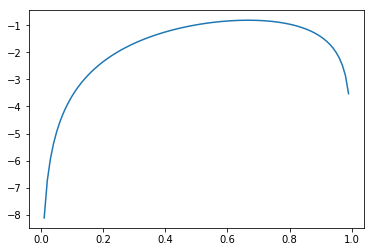

In [41]:
plt.plot(h, log_likelihood)

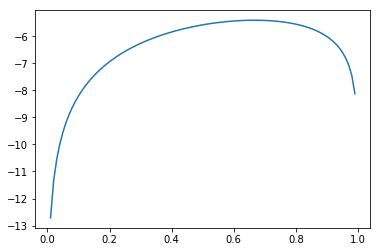

In [42]:
plt.plot(h, log_posterior)

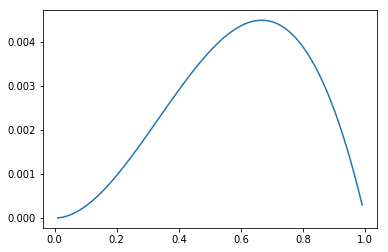

In [43]:
plt.plot(h, np.exp(log_posterior))